In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [0]:
def prep(x):#takes a row of the dataset and preps it for nural net
  out=[]
  y=x[0]
  x=x[1:]
  x=np.array(x)
  for i,v in enumerate(x):
    if i!=7 and i!=8:
      x[i]=np.array(v)
  for i in x:
    try:
      for j in i:
        out.append(float(j))
    except:
      out.append(float(i))
  
  return out,y

In [0]:
def liniar1(arg):
  return arg

In [0]:
train_url="https://raw.githubusercontent.com/brianbob12/brianbob12.github.io/master/titanic_train.csv"
train_data=pd.read_csv(train_url)
train_data=train_data.drop(columns=["Name","Ticket"])#remove irrelecent or unusable data

#split the cabin data into two poits
pre_CabinA=[]#CabinA is the cabin letter(as an array of 8  -Nan and the 7 letters)
#pre_CabinA    [A,B,C,D,E,F,G,T,nan]
pre_CabinB=[]#CabinB is the cabin number 0 for nan
for cab in train_data["Cabin"]:
  if str(cab) =="nan":
    pre_CabinA.append(np.array([0 for i in range(8)]))
    pre_CabinB.append(0)
  elif len(str(cab).split(" "))>1:
    a=str(cab).split(" ")
    for pos in a:
      if len(str(pos))>1:
        new_cab=pos
    
    let=new_cab[0]
    to_let=[0 for i in range(8)]
    if let!="T":
      to_let[ord(let)-65]=1
    else:
      to_let[6]=1
    num=int(new_cab[1:])
    pre_CabinA.append(np.array(to_let))
    pre_CabinB.append(num)
  else:
    
    if len(str(cab))==1:
      new_cab=cab+"0"
    else:
      new_cab=cab
    
    let=new_cab[0]
    to_let=[0 for i in range(8)]
    if let!="T":
      to_let[ord(let)-65]=1
    else:
      to_let[6]=1
    num=int(new_cab[1:])
    pre_CabinA.append(np.array(to_let))
    pre_CabinB.append(num)
train_data["CabinA"]=pre_CabinA
train_data["CabinB"]=pre_CabinB
new_age=[]
for ind in train_data["Age"]:
  if str(ind).lower()=="nan":
    new_age.append(-1)#unavailable age
  else:
    new_age.append(int(ind))
train_data["Age"]=new_age
train_data=train_data.drop(columns=["Cabin","PassengerId"])

#embarked
#array of 4
new_embark=[]
un=train_data["Embarked"].unique()
for i in train_data["Embarked"]:
  for inx,j in enumerate(un):
    if str(i)==str(j):
      ps=[0 for i in range(4)]
      ps[inx]=1
      new_embark.append(np.array(ps))
      break
train_data["Embarked"]=new_embark
#sex
#0-female
#1-male
new_sex=[]
for i in train_data["Sex"]:
  if i=="female":
    new_sex.append(0)
  else:
    new_sex.append(1)
train_data["Sex"]=new_sex

In [0]:
#TESTING PROTOCOL
n_test=30
test_const=5#test constant spreads out the testdata amung the dataset
hold_out=[]#the hold_out data is a lit of indeces for traking progress of the network
for i in range(n_test):
  hold_out.append((i*test_const)%(891+1))

testing_log=[[],[],[],[]]#testing_log[0] is ,iteration testing_log[1] is accurasy testting_log[2] is average guess testing_log[3] is train error

def Test(iteration):
  batch_X=[]
  batch_Y=[]
  for indx in hold_out:
    x,y=prep(train_data.loc[indx])
    batch_X.append(x)
    batch_Y.append([y])
  error=math.sqrt(sess.run(tf.reduce_mean(cross_entropy),feed_dict={X:batch_X,Y:batch_Y,dropout:0}))
  average_guess=tf.math.reduce_mean(sess.run(out_layer,feed_dict={X:batch_X,Y:batch_Y,dropout:0}))
  print("-"*15)
  print("iteration:",iteration)
  print("average guess:",sess.run(average_guess))
  print("error:",error)
  print("-"*15)
  testing_log[0].append(iteration)
  testing_log[1].append(error)
  testing_log[2].append(sess.run(average_guess))
  
ans=[]
for indx in hold_out:
    x,y=prep(train_data.loc[indx]) 
    ans.append(y)
test_data_average=sum(ans)/len(ans)

In [0]:
surviv_rate=sum(train_data["Survived"])/train_data.count()["Survived"]
print("data survival rate:"+str(surviv_rate))

data survival rate:0.3838383838383838


In [0]:
train_data

In [0]:
x,y=prep(train_data.loc[1])
print(x)
print(y)

network

In [0]:
#CONSTANTS
n_input=19
n_out=1
n_layers=4#excludes input layer includes output layer
layer_number=[128,64,32,1]#number of neurons in each layer, excludes input layer includes output layer
layer_activation=[tf.nn.relu,tf.nn.relu,tf.nn.relu,tf.nn.relu,tf.nn.relu]#activation function for each layer
training_keep_probs=[0.5,0.5,1]#for each layer REMEMBER SET OUTPUT KEEP PROB TO 1
#for the output 0=died 1=survived

learning_rate=0.05
batch_size=train_data.count()[0]-n_test#the whole dataset
batch_iterations=180
total_iterations=batch_size*batch_iterations
#if total_iterations>train_data.shape[0]:
#  print("only",train_data.shape[0],"datapoints available")
#start_weight=0.01
#weight_constant=0.001

X=tf.placeholder("float",[None,n_input])
Y=tf.placeholder("float",[None,n_out])
dropout=tf.placeholder("float")#if 1 then dropout occurs ,if 0 no dropout occurs

test_occurance=6#in batch iterations

print("current structure:")
print("learning rate:\t"+str(learning_rate))
print("batch size:\t"+str(batch_size))
print("\tinput layer positive float\t-19-")
for i in range(n_layers-1):
  print("\thidden layer positive float\t",end="")
  print("-"+str(layer_number[i])+"-\tactivation:"+str(layer_activation[i]))
print("\toutput layer positive float\t-1-\tactivation:"+str(layer_activation[-1]))

current structure:
learning rate:	0.05
batch size:	861
	input layer positive float	-19-
	hidden layer positive float	-128-	activation:<function relu at 0x7f0ea59dde18>
	hidden layer positive float	-64-	activation:<function relu at 0x7f0ea59dde18>
	hidden layer positive float	-32-	activation:<function relu at 0x7f0ea59dde18>
	output layer positive float	-1-	activation:<function relu at 0x7f0ea59dde18>


In [0]:
weights=[]
biases=[]
layers=[]
dropout_layers=[]

for i in range(n_layers):
  biases.append(tf.Variable(tf.constant(0.1,shape=[layer_number[i]])))
  if i==0:#first layer
    #weights.append(tf.Variable(tf.constant(start_weight,shape=[n_input,layer_number[i]])))
    weights.append(tf.Variable(
        tf.math.scalar_mul(tf.math.sqrt(1/layer_number[i]**(i)),tf.truncated_normal([n_input,layer_number[i]],stddev=0.1))
                  ))
    #layers.append(tf.nn.dropout(layer_activation[i](tf.math.add(tf.matmul(X,weights[i]),biases[i])),rate=1-(training_keep_probs[i]*dropout)))
    layers.append(layer_activation[i](tf.math.add(tf.matmul(X,weights[i]),biases[i])))
    
  else:
    #weights.append(tf.Variable(tf.constant(start_weight+,shape=[layer_number[i-1],layer_number[i]])))
    weights.append(tf.Variable(
        tf.math.scalar_mul(tf.math.sqrt(1/layer_number[i]**(i)),tf.truncated_normal([layer_number[i-1],layer_number[i]],stddev=0.1))
                  ))
    #layers.append(tf.nn.dropout(layer_activation[i](tf.math.add(tf.matmul(layers[-1],weights[i]),biases[i])),rate=1-(training_keep_probs[i]*dropout)))
    layers.append(layer_activation[i](tf.math.add(tf.matmul(layers[i-1],weights[i]),biases[i])))

out_layer=layers[-1]#take the final layer

#cross_entropy=tf.reduce_mean(tf.nn.sigmid_cross_entropy_with_logits(labels=Y,logits=out_layer))
cross_entropy=tf.reduce_mean(tf.square(tf.math.subtract(out_layer,Y)))
training_step=tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

In [0]:
testing_log=[[],[],[],[]]
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
Test(0)
place=0#excludes test data
for i in range(batch_iterations):
  batch_X=[]
  batch_Y=[]
  for j in range(batch_size):
    x,y=prep(train_data.loc[place])
    place+=1
    place%=train_data.count()[0]
    while place in hold_out:#if the index in test_data just keep going
      place+=1
      place%=train_data.count()[0]
    batch_X.append(x)
    batch_Y.append([y])
  results=sess.run([cross_entropy,training_step],feed_dict={X:batch_X,Y:batch_Y,dropout:1})
  if (i+1)%test_occurance==0:
    x=math.sqrt(results[0])
    print("training error:",x)
    testing_log[3].append(x)
    Test(i+1)


---------------
iteration: 0
average guess: 0.12642089
error: 0.43645913762069316
---------------
training error: 0.5759272945284326
---------------
iteration: 6
average guess: 0.34318197
error: 0.6571107850259763
---------------
training error: 0.6237647485996105
---------------
iteration: 12
average guess: 0.0
error: 0.48304589256792574
---------------
training error: 0.6237647485996105
---------------
iteration: 18
average guess: 0.0
error: 0.48304589256792574
---------------
training error: 0.6237647485996105
---------------
iteration: 24
average guess: 0.0
error: 0.48304589256792574
---------------


KeyboardInterrupt: ignored

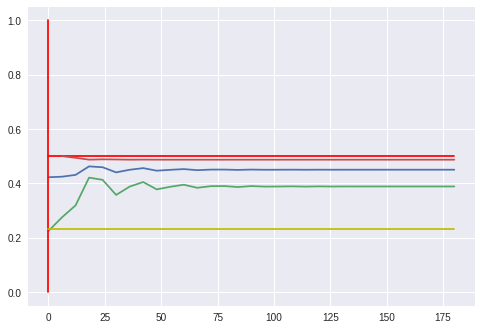

In [0]:
plt.plot(testing_log[0],testing_log[1])#graphing error
plt.plot(testing_log[0],testing_log[2])#graphing average guess
plt.plot([0,0],[0,1],"r")
plt.plot([0,batch_iterations],[0.5,0.5],"r")
plt.plot([0,batch_iterations],[test_data_average,test_data_average],"y")
plt.plot(testing_log[0][1:],testing_log[3])
plt.show()


In [0]:
sess.run(weights[0])

array([[-0.16443181, -0.10576075, -0.05585624, ...,  0.10315685,
        -0.02623703,  0.00111963],
       [-0.20860457,  0.00634965,  0.08074883, ..., -0.05489729,
         0.03758308, -0.10141505],
       [-0.09730501, -0.04462957, -0.00532899, ..., -0.05176582,
         0.01044383, -0.1996431 ],
       ...,
       [-0.1788281 , -0.11392321, -0.13892026, ...,  0.01962324,
        -0.07983497, -0.23447305],
       [ 0.09623888, -0.08428939,  0.08082709, ...,  0.11812884,
         0.13036336,  0.02489224],
       [-0.03439557, -0.00041214, -0.00092972, ..., -0.05083841,
         0.04666192, -0.00682013]], dtype=float32)

In [0]:
test_i=861
print(train_data.loc[test_i])
x,y=prep(train_data.loc[test_i])
test_guess = sess.run(out_layer, feed_dict={X:[x], Y: [[y]],dropout:0})
error=sess.run(cross_entropy,feed_dict={X:[x],Y:[[y]],dropout:0})
print("\nguess on test:",test_guess )
print("error:",math.sqrt(error))
print(y)

Survived                           0
Pclass                             2
Sex                                1
Age                               21
SibSp                              1
Parch                              0
Fare                            11.5
Embarked                [1, 0, 0, 0]
CabinA      [0, 0, 0, 0, 0, 0, 0, 0]
CabinB                             0
Name: 861, dtype: object

guess on test: [[0.24798352 0.24769664 0.24814212 0.24796711 0.24784565 0.24808794
  0.24775033 0.24747139 0.24786322 0.2479305  0.24796183 0.24808967
  0.24799599 0.24830061 0.24785405 0.24752308 0.24780232 0.24833287
  0.24760026 0.2478061  0.2475564  0.24815735 0.24825649 0.24737954
  0.24776569 0.24822262 0.2478931  0.24820395 0.2476953  0.24812602
  0.24808589 0.24855469 0.2478621  0.24802755 0.24837983 0.24803258
  0.24793261 0.24785253 0.24804191 0.24811503 0.24836104 0.2481059
  0.24848242 0.24795595 0.24815838 0.24802954 0.24807274 0.24778663
  0.24820028 0.24772269 0.24766897 0.24832048 

TypeError: ignored

In [0]:
new=np.array([[0],[1],[1],[30],[0],[0],[30],[1,0,0,0],[1,0,0,0,0,0,0,0],[31]])
x,y=prep(new)
tracker=sess.run([out_layer,layers,X], feed_dict={X:[x], Y: [y]})
test_guess = tracker[0]
layer_values=tracker[1]
inputs=tracker[2]
print(test_guess[0][0])
print(tracker[2])
layer_values[0]

0.24798352
[[ 1.  1. 30.  0.  0. 30.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  31.]]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.1990747 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.41410166, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 4.667697  ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 3.543169  , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.5066113 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        3.5985923 , 0.        , 0.        , 0.  

Kaggle test subission

In [0]:
test_url="https://raw.githubusercontent.com/brianbob12/brianbob12.github.io/master/titanic_test.csv"
test_data=pd.read_csv(test_url)
test_data=test_data.drop(columns=["Name","Ticket"])#remove irrelecent or unusable data

#split the cabin data into two poits
pre_CabinA=[]#CabinA is the cabin letter(as an array of 8  -Nan and the 7 letters)
#pre_CabinA    [A,B,C,D,E,F,G,T,nan]
pre_CabinB=[]#CabinB is the cabin number 0 for nan
for cab in test_data["Cabin"]:
  if str(cab) =="nan":
    pre_CabinA.append(np.array([0 for i in range(8)]))
    pre_CabinB.append(0)
  elif len(str(cab).split(" "))>1:
    a=str(cab).split(" ")
    for pos in a:
      if len(str(pos))>1:
        new_cab=pos
    
    let=new_cab[0]
    to_let=[0 for i in range(8)]
    if let!="T":
      to_let[ord(let)-65]=1
    else:
      to_let[6]=1
    num=int(new_cab[1:])
    pre_CabinA.append(np.array(to_let))
    pre_CabinB.append(num)
  else:
    
    if len(str(cab))==1:
      new_cab=cab+"0"
    else:
      new_cab=cab
    
    let=new_cab[0]
    to_let=[0 for i in range(8)]
    if let!="T":
      to_let[ord(let)-65]=1
    else:
      to_let[6]=1
    num=int(new_cab[1:])
    pre_CabinA.append(np.array(to_let))
    pre_CabinB.append(num)
test_data["CabinA"]=pre_CabinA
test_data["CabinB"]=pre_CabinB
new_age=[]
for ind in test_data["Age"]:
  if str(ind).lower()=="nan":
    new_age.append(-1)#unavailable age
  else:
    new_age.append(int(ind))
test_data["Age"]=new_age
test_data=test_data.drop(columns=["Cabin"])

#embarked
#array of 4
new_embark=[]
un=test_data["Embarked"].unique()
for i in test_data["Embarked"]:
  for inx,j in enumerate(un):
    if str(i)==str(j):
      ps=[0 for i in range(4)]
      ps[inx]=1
      new_embark.append(np.array(ps))
      break
test_data["Embarked"]=new_embark
#sex
#0-female
#1-male
new_sex=[]
for i in test_data["Sex"]:
  if i=="female":
    new_sex.append(0)
  else:
    new_sex.append(1)
test_data["Sex"]=new_sex

In [0]:
out=pd.DataFrame({"PassengerId":[],"Survived":[]})
passengar=[]
life=[]
for i in range(test_data.count()[0]):
  x,y=prep(test_data.loc[i])#y is passengarId
  passengar.append(y)
  life.append(round(sess.run(out_layer,feed_dict={X:[x],Y:[[y]]})[0][0]))
out["PassengerId"]=passengar
out["Survived"]=life
out.to_csv("preds.csv")